<a href="https://colab.research.google.com/github/madihagulraiz771/Cat-Dog-Classifier/blob/main/cat%26dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Download the dataset from Kaggle

# Create the necessary Kaggle directory and copy the Kaggle API key (kaggle.json) to that directory
!mkdir -p ~/.kaggle

In [ ]:
# Download the "Dogs vs Cats" dataset from Kaggle
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:54<00:00, 22.6MB/s]
100% 1.06G/1.06G [00:54<00:00, 20.9MB/s]


In [ ]:
# Step 2: Unzip the dataset
import zipfile

with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [ ]:
# Step 3: Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
# Step 4: Prepare training and validation datasets
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',  # Make sure your extracted dataset has this structure
    labels= 'inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)  # Resize images to 256x256
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels= 'inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Step 5: Normalize the datasets (both training and validation)
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)  # Normalize the pixel values to [0, 1]
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Step 6: Build the CNN model
model = Sequential()

# First convolutional block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification (cats vs dogs)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 7: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 8: Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 9: Train the model
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 81ms/step - accuracy: 0.6028 - loss: 0.6557 - val_accuracy: 0.7672 - val_loss: 0.4948
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.7643 - loss: 0.4906 - val_accuracy: 0.7964 - val_loss: 0.4512
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 74ms/step - accuracy: 0.8204 - loss: 0.3982 - val_accuracy: 0.8002 - val_loss: 0.4684
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8791 - loss: 0.2758 - val_accuracy: 0.7742 - val_loss: 0.6328
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9412 - loss: 0.1443 - val_accuracy: 0.7884 - val_loss: 0.7267
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 76ms/step - accuracy: 0.9682 - loss: 0.0883 - val_accuracy: 0.7858 - val_loss: 0.9031
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.9784 - loss: 0.0607 - val_accuracy: 0.7776 - val_loss: 1.2257
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.9845 - loss: 0.0446 - 

In [ ]:
# Step 10: Preprocess a test image for prediction
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Resize image to (256, 256)
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image to the range [0, 1]
    return img_array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
It's a cat!
Prediction (probability): [4.849993e-12]


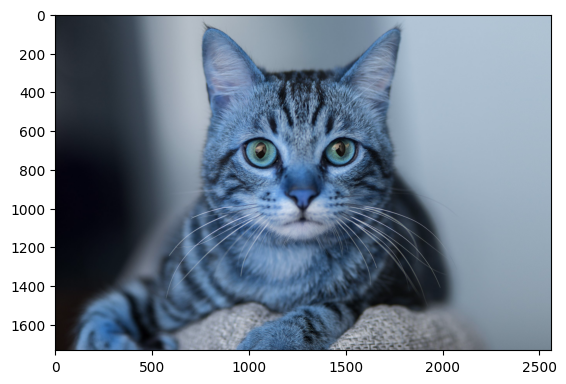

In [ ]:
import cv2
import matplotlib.pyplot as plt
test_img = cv2.imread('/content/cat-10-e1573844975155-scaled.jpg')
plt.imshow(test_img)

# Step 11: Test the model with a new image
test_img = preprocess_image('/content/cat-10-e1573844975155-scaled.jpg')  # Replace with the path to your image
prediction = model.predict(test_img)


# Apply a threshold to classify the image
if prediction[0] > 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")

# Print the raw prediction probability for debugging
print(f"Prediction (probability): {prediction[0]}")